In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv("data/test_no_23.csv")
df

,Time,Moment Z,Axial force,Y-Axis,X-Axis
0,0.0,0.523158,0.289350,0.015466,-0.030452
1,0.5,0.570243,0.290789,0.014899,-0.030365
2,1.0,0.582014,0.291094,0.015270,-0.030158
3,1.5,0.622995,0.292969,0.016142,-0.030038
4,2.0,0.602940,0.293405,0.016948,-0.029787
...,...,...,...,...,...
236,118.0,0.000000,0.000000,0.000000,0.000000
237,118.5,0.000000,0.000000,0.000000,0.000000
238,119.0,0.000000,0.000000,0.000000,0.000000
239,119.5,0.000000,0.000000,0.000000,0.000000


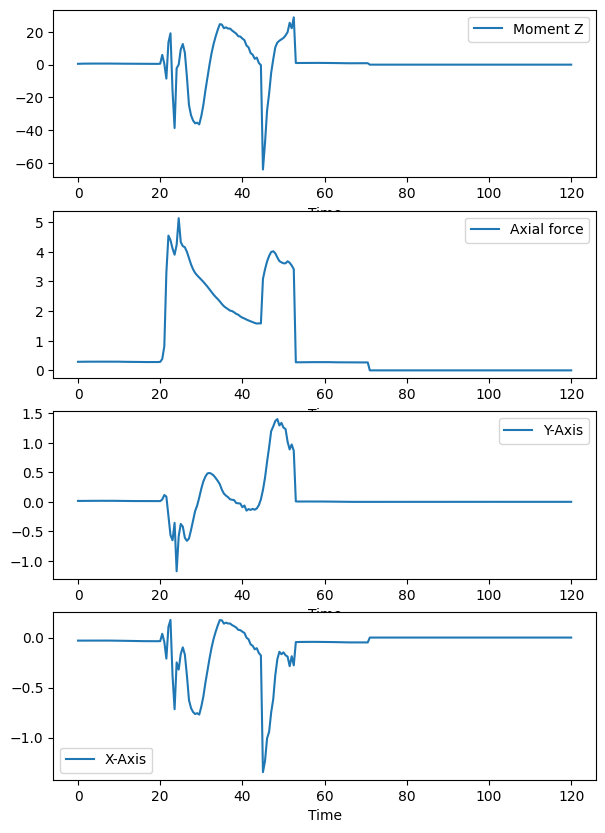

In [24]:
cols = [col for col in df.columns if col != "Time"]
fig, axes = plt.subplots(nrows=4, ncols=1,figsize=(7,10))
for idx, col in enumerate(cols):
    df.plot(x="Time", y=col, ax=axes[idx])

In [25]:
def genVal(low, high, n):
    return np.random.uniform(low=low, high=high, size=(n,))

n = 100
m1Arr = genVal(100, 200, n)
m2Arr = genVal(1000, 1500, n)
m3Arr = genVal(1, 3, n)

In [26]:
def genTimeSeries(params):
    tau = params.get("tau")
    period = params.get("period")
    shift = params.get("shift")
    amp = params.get("amp")
    base = params.get("base")
    t = np.arange(tau)
    s = amp * np.sin(2 * np.pi * t / period + shift) + base
    return t, s


periods = genVal(20, 40, n)
shifts = genVal(0, 100, n)
amps = genVal(0, 3, n)
taus = np.floor(genVal(200, 300, n))
bases = genVal(0, 10, n)

tsArr = []

for period, shift, amp, tau, base in zip(periods, shifts, amps, taus, bases):
    params = dict(period=period, shift=shift, amp=amp, tau=tau, base=base)
    ts = genTimeSeries(params)
    tsArr.append(ts)

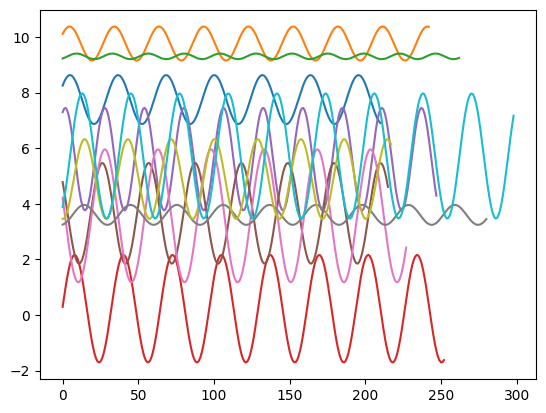

In [27]:
for i in range(10):
    t = tsArr[i][0]
    s = tsArr[i][1]
    plt.plot(t,s)

In [28]:
data = {
    "m1": m1Arr,
    "m2": m2Arr,
    "m3": m3Arr,
    "ts": tsArr,
    "_period": periods,
    "_shift": shifts,
    "_amp": amps,
    "_tau": taus,
    "_base": bases,
}

idxes = [f"E{str(i+1).zfill(3)}" for i in np.arange(n)]
dfData = pd.DataFrame(data=data, index=idxes)
dfData

,m1,m2,m3,ts,_period,_shift,_amp,_tau,_base
E001,187.616451,1415.961916,2.557955,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",31.782181,13.176119,0.880781,211.0,7.748737
E002,101.574829,1155.296145,1.610162,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",29.556957,38.294287,0.612714,243.0,9.765517
E003,105.981660,1354.421797,1.471213,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",23.727254,30.559609,0.100837,263.0,9.303469
E004,183.202078,1143.123554,2.027678,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",32.338998,75.432983,1.935004,253.0,0.225469
E005,190.252994,1018.419233,2.150465,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",26.159491,51.423037,1.845271,248.0,5.606031
...,...,...,...,...,...,...,...,...,...
E096,123.285366,1211.718930,1.957715,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",29.202681,78.052149,2.280265,206.0,7.222971
E097,171.108706,1172.281630,2.589227,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",34.334935,83.433174,1.509359,202.0,9.915345
E098,118.883232,1016.639187,1.994456,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",29.929728,67.766035,0.035803,237.0,3.472133
E099,192.634263,1179.259361,2.870076,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",20.139367,95.328003,0.868636,254.0,1.522399


In [29]:
dfDataStats = dfData.describe()
dfDataStats

,m1,m2,m3,_period,_shift,_amp,_tau,_base
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,147.399750,1239.831730,2.008414,29.465647,50.968918,1.472035,250.890000,4.984861
std,31.241299,145.971441,0.596956,5.600656,30.123942,0.881941,29.630688,2.937495
min,100.897806,1001.503660,1.013998,20.005942,0.279492,0.035803,200.000000,0.140687
25%,117.760958,1143.518576,1.464268,24.745111,27.021978,0.553924,228.750000,2.184576
50%,142.575125,1233.937120,2.031113,29.926332,51.928260,1.572492,251.000000,4.848758
75%,178.432066,1340.320675,2.560247,33.829306,77.044161,2.238235,276.250000,7.295904
max,199.810261,1496.492728,2.949874,39.619954,99.207341,2.910760,299.000000,9.915345


In [30]:
def cal_y(row, stats):
    m1_mean = stats.loc["mean", "m1"]
    m2_mean = stats.loc["mean", "m2"]
    m3_mean = stats.loc["mean", "m3"]
    period_mean = stats.loc["mean", "_period"]
    y1 = (row["m1"]/m1_mean + row["_period"]/period_mean * 2) * 20
    y2 = (row["m2"]/m2_mean)  / (row["_period"]/period_mean)
    y3 = ((row["m3"]/m3_mean) - (row["_period"]/period_mean * 2)) * -100
    return pd.Series(data=[y1, y2, y3], index=["y1", "y2", "y3"])
    pass

dfData[["y1", "y2", "y3"]] = dfData.apply(lambda row: cal_y(row, dfDataStats), axis=1)
dfData

,m1,m2,m3,ts,_period,_shift,_amp,_tau,_base,y1,y2,y3
E001,187.616451,1415.961916,2.557955,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",31.782181,13.176119,0.880781,211.0,7.748737,68.601545,1.058818,88.361693
E002,101.574829,1155.296145,1.610162,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",29.556957,38.294287,0.612714,243.0,9.765517,53.906180,0.928938,120.448962
E003,105.981660,1354.421797,1.471213,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",23.727254,30.559609,0.100837,263.0,9.303469,46.590224,1.356625,87.797819
E004,183.202078,1143.123554,2.027678,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",32.338998,75.432983,1.935004,253.0,0.225469,68.758466,0.840078,118.543881
E005,190.252994,1018.419233,2.150465,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",26.159491,51.423037,1.845271,248.0,5.606031,61.326411,0.925232,70.486440
...,...,...,...,...,...,...,...,...,...,...,...,...
E096,123.285366,1211.718930,1.957715,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",29.202681,78.052149,2.280265,206.0,7.222971,56.371049,0.986126,100.739430
E097,171.108706,1172.281630,2.589227,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",34.334935,83.433174,1.509359,202.0,9.915345,69.827081,0.811426,104.131621
E098,118.883232,1016.639187,1.994456,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",29.929728,67.766035,0.035803,237.0,3.472133,56.760719,0.807267,103.844925
E099,192.634263,1179.259361,2.870076,"([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0,...",20.139367,95.328003,0.868636,254.0,1.522399,53.477118,1.391607,-6.205357


In [31]:
def genTsfreshData(row):
    ts = row["ts"]
    t = ts[0]
    s = ts[1]
    data = {"time": t, "s1": s}
    df = pd.DataFrame(data)
    df["id"] = row.name
    return df

temp = dfData.apply(genTsfreshData, axis=1)
dfTsf = pd.concat(temp.values, axis=0)
dfTsf

,time,s1,id
0,0.0,8.253127,E001
1,1.0,8.385121,E001
2,2.0,8.492325,E001
3,3.0,8.570561,E001
4,4.0,8.616782,E001
...,...,...,...
254,254.0,1.536706,E100
255,255.0,1.474639,E100
256,256.0,1.346528,E100
257,257.0,1.162239,E100


In [32]:
from tsfresh import extract_features

dfEx = extract_features(dfTsf, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 34/34 [00:04<00:00,  7.97it/s]


In [33]:
dfEx

,s1__variance_larger_than_standard_deviation,s1__has_duplicate_max,s1__has_duplicate_min,s1__has_duplicate,s1__sum_values,s1__abs_energy,s1__mean_abs_change,s1__mean_change,s1__mean_second_derivative_central,s1__median,...,s1__fourier_entropy__bins_5,s1__fourier_entropy__bins_10,s1__fourier_entropy__bins_100,s1__permutation_entropy__dimension_3__tau_1,s1__permutation_entropy__dimension_4__tau_1,s1__permutation_entropy__dimension_5__tau_1,s1__permutation_entropy__dimension_6__tau_1,s1__permutation_entropy__dimension_7__tau_1,s1__query_similarity_count__query_None__threshold_0.0,s1__mean_n_absolute_max__number_of_maxima_7
E001,0.0,0.0,0.0,0.0,1639.705382,12824.560454,0.110485,-0.006426,-4.718158e-04,7.801310,...,0.106678,0.106678,0.212994,0.963034,1.231859,1.498082,1.761222,2.020710,NaN,8.627991
E002,0.0,0.0,0.0,0.0,2376.449125,23286.975556,0.082015,0.001060,-2.320794e-04,9.792409,...,0.095013,0.142417,0.142417,0.995524,1.281548,1.564123,1.842677,2.116518,NaN,10.377525
E003,0.0,0.0,0.0,0.0,2446.679867,22762.713689,0.016961,0.000076,1.851519e-09,9.302087,...,0.090729,0.136002,0.136002,1.040343,1.381715,1.716246,2.042710,2.349507,NaN,9.404188
E004,1.0,0.0,0.0,0.0,63.127491,492.116683,0.237752,-0.007599,-5.895168e-04,0.286329,...,0.091910,0.137770,0.137770,0.969094,1.242436,1.501068,1.756682,2.008798,NaN,2.158470
E005,1.0,0.0,0.0,0.0,1398.914958,8312.575892,0.281851,-0.012168,-9.621084e-04,5.694357,...,0.082034,0.082034,0.185988,1.017058,1.336826,1.639807,1.937380,2.228578,NaN,7.449900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E096,1.0,0.0,0.0,0.0,1489.414826,11301.589135,0.312091,-0.001266,4.458581e-05,7.271042,...,0.149069,0.149069,0.162399,0.987132,1.278287,1.565952,1.849467,2.128026,NaN,9.498871
E097,1.0,0.0,0.0,0.0,1997.200921,19972.962560,0.177900,-0.001820,6.931398e-04,9.887831,...,0.110100,0.165004,0.165004,0.941492,1.188836,1.434589,1.678424,1.919961,NaN,11.420041
E098,0.0,0.0,0.0,0.0,822.981147,2857.947756,0.004821,0.000015,-1.420093e-05,3.472429,...,0.096986,0.145372,0.145372,0.961743,1.227675,1.490516,1.749766,2.004826,NaN,3.507859
E099,0.0,0.0,0.0,0.0,388.211761,689.817923,0.171466,-0.006445,-3.104760e-04,1.531841,...,0.091315,0.091315,0.182382,1.083354,1.465169,1.826857,2.177156,2.513529,NaN,2.390181


In [34]:
# Some features have NaN.
from sklearn.impute import SimpleImputer

# Drop columns which contains all NaN.
dfExDrop = dfEx.dropna(axis=1, how="any")

imputer = SimpleImputer(strategy="mean")
exIm = imputer.fit_transform(dfExDrop)
dfExIm = pd.DataFrame(exIm, columns=dfExDrop.columns, index=dfExDrop.index)

In [35]:
from tsfresh.feature_selection.relevance import calculate_relevance_table

def calRelTable(dfEx, target):
    rt = calculate_relevance_table(dfExIm, dfData["y1"])
    rt = rt[rt.relevant].reset_index(drop=True)
    return rt

r1 = calRelTable(dfExIm, dfData["y1"])
r2 = calRelTable(dfExIm, dfData["y2"])
r3 = calRelTable(dfExIm, dfData["y3"])

In [36]:
_dfRt = pd.concat([r1, r2, r3])
dfRt = _dfRt[~_dfRt["feature"].duplicated()]
dfRt

,feature,type,p_value,relevant
0,s1__approximate_entropy__m_2__r_0.7,real,3.951136e-23,True
1,s1__autocorrelation__lag_9,real,4.450906e-23,True
2,s1__autocorrelation__lag_8,real,4.450906e-23,True
3,s1__autocorrelation__lag_7,real,4.723771e-23,True
4,s1__longest_strike_above_mean,real,5.511852e-23,True
5,s1__autocorrelation__lag_6,real,6.745442e-23,True
6,s1__autocorrelation__lag_5,real,8.547774e-23,True
7,s1__approximate_entropy__m_2__r_0.9,real,1.148320e-22,True
8,s1__autocorrelation__lag_4,real,1.634600e-22,True
9,s1__autocorrelation__lag_3,real,2.191707e-22,True


In [37]:
dfExRel = dfEx[dfRt["feature"]]
dfExRel

,s1__approximate_entropy__m_2__r_0.7,s1__autocorrelation__lag_9,s1__autocorrelation__lag_8,s1__autocorrelation__lag_7,s1__longest_strike_above_mean,s1__autocorrelation__lag_6,s1__autocorrelation__lag_5,s1__approximate_entropy__m_2__r_0.9,s1__autocorrelation__lag_4,s1__autocorrelation__lag_3,...,s1__ar_coefficient__coeff_9__k_10,"s1__fft_coefficient__attr_""abs""__coeff_7","s1__fft_coefficient__attr_""abs""__coeff_5","s1__agg_autocorrelation__f_agg_""mean""__maxlag_40",s1__ar_coefficient__coeff_10__k_10,"s1__fft_coefficient__attr_""abs""__coeff_4",s1__ar_coefficient__coeff_8__k_10,s1__approximate_entropy__m_2__r_0.5,"s1__fft_coefficient__attr_""abs""__coeff_3",s1__approximate_entropy__m_2__r_0.1
E001,0.185766,-0.212687,-0.016548,0.180225,16.0,0.369965,0.545277,0.131246,0.699333,0.826130,...,0.038780,74.893291,15.773122,0.111814,0.275924,9.657168,-0.129524,0.281910,7.000403,0.130575
E002,0.201643,-0.337147,-0.130801,0.081408,15.0,0.289928,0.485372,0.142735,0.658943,0.802829,...,0.049064,13.171094,5.600086,0.073067,0.295375,4.576206,-0.127716,0.287208,3.997053,0.138715
E003,0.280074,-0.724746,-0.519171,-0.277401,12.0,-0.016292,0.245955,0.195325,0.491058,0.701930,...,0.065980,0.270056,0.186345,-0.103510,0.311143,0.164255,-0.115387,0.295983,0.149326,0.160892
E004,0.181729,-0.174395,0.019032,0.211732,16.0,0.396457,0.566256,0.126495,0.714741,0.836326,...,-0.077881,49.008474,13.818993,0.116791,-0.191406,10.139354,0.064453,0.286139,8.100158,0.120629
E005,0.247459,-0.562449,-0.349593,-0.116660,13.0,0.122974,0.355548,0.171106,0.567706,0.747264,...,0.049794,27.969691,15.105369,-0.045042,0.286307,12.336134,-0.121797,0.293460,10.561980,0.144695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E096,0.209433,-0.343457,-0.135129,0.079437,15.0,0.290354,0.487901,0.146667,0.662974,0.807503,...,0.044761,233.138542,5.522894,0.066662,0.284210,3.495014,-0.126807,0.292981,2.479072,0.139686
E097,0.170358,-0.096222,0.086531,0.266421,18.0,0.437431,0.593843,0.124140,0.730424,0.842604,...,0.038263,14.448131,21.090707,0.109240,0.279451,10.787046,-0.132115,0.275886,7.778968,0.118161
E098,0.204307,-0.330808,-0.126855,0.082689,15.0,0.288616,0.481876,0.142597,0.653975,0.797350,...,0.008633,0.394361,0.142901,0.078706,0.199834,0.115233,-0.124313,0.313158,0.100125,0.127543
E099,0.293004,-0.947820,-0.803889,-0.582338,11.0,-0.304567,0.002599,0.242642,0.309496,0.586490,...,-0.108826,4.564469,2.959061,-0.006820,0.226501,2.439489,-0.217529,0.268965,2.044825,0.168562


In [38]:
cols1 = ["m1", "m2", "m3"]
cols2 = ["y1", "y2", "y3"]
dfTrain = pd.concat([dfData[cols1], dfExRel, dfData[cols2]], axis=1)
dfTrain

,m1,m2,m3,s1__approximate_entropy__m_2__r_0.7,s1__autocorrelation__lag_9,s1__autocorrelation__lag_8,s1__autocorrelation__lag_7,s1__longest_strike_above_mean,s1__autocorrelation__lag_6,s1__autocorrelation__lag_5,...,"s1__agg_autocorrelation__f_agg_""mean""__maxlag_40",s1__ar_coefficient__coeff_10__k_10,"s1__fft_coefficient__attr_""abs""__coeff_4",s1__ar_coefficient__coeff_8__k_10,s1__approximate_entropy__m_2__r_0.5,"s1__fft_coefficient__attr_""abs""__coeff_3",s1__approximate_entropy__m_2__r_0.1,y1,y2,y3
E001,187.616451,1415.961916,2.557955,0.185766,-0.212687,-0.016548,0.180225,16.0,0.369965,0.545277,...,0.111814,0.275924,9.657168,-0.129524,0.281910,7.000403,0.130575,68.601545,1.058818,88.361693
E002,101.574829,1155.296145,1.610162,0.201643,-0.337147,-0.130801,0.081408,15.0,0.289928,0.485372,...,0.073067,0.295375,4.576206,-0.127716,0.287208,3.997053,0.138715,53.906180,0.928938,120.448962
E003,105.981660,1354.421797,1.471213,0.280074,-0.724746,-0.519171,-0.277401,12.0,-0.016292,0.245955,...,-0.103510,0.311143,0.164255,-0.115387,0.295983,0.149326,0.160892,46.590224,1.356625,87.797819
E004,183.202078,1143.123554,2.027678,0.181729,-0.174395,0.019032,0.211732,16.0,0.396457,0.566256,...,0.116791,-0.191406,10.139354,0.064453,0.286139,8.100158,0.120629,68.758466,0.840078,118.543881
E005,190.252994,1018.419233,2.150465,0.247459,-0.562449,-0.349593,-0.116660,13.0,0.122974,0.355548,...,-0.045042,0.286307,12.336134,-0.121797,0.293460,10.561980,0.144695,61.326411,0.925232,70.486440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E096,123.285366,1211.718930,1.957715,0.209433,-0.343457,-0.135129,0.079437,15.0,0.290354,0.487901,...,0.066662,0.284210,3.495014,-0.126807,0.292981,2.479072,0.139686,56.371049,0.986126,100.739430
E097,171.108706,1172.281630,2.589227,0.170358,-0.096222,0.086531,0.266421,18.0,0.437431,0.593843,...,0.109240,0.279451,10.787046,-0.132115,0.275886,7.778968,0.118161,69.827081,0.811426,104.131621
E098,118.883232,1016.639187,1.994456,0.204307,-0.330808,-0.126855,0.082689,15.0,0.288616,0.481876,...,0.078706,0.199834,0.115233,-0.124313,0.313158,0.100125,0.127543,56.760719,0.807267,103.844925
E099,192.634263,1179.259361,2.870076,0.293004,-0.947820,-0.803889,-0.582338,11.0,-0.304567,0.002599,...,-0.006820,0.226501,2.439489,-0.217529,0.268965,2.044825,0.168562,53.477118,1.391607,-6.205357


In [39]:
dfTrain.to_excel("output/data_train_2.xlsx", index=True)